# 📚 Table des matières du projet Fine-Tuning GPT-Neo 1.3B (Arabe QA)

## 📌 Schéma du Notebook : Fine-Tuning aragpt2-medium pour la QA en arabe

```plaintext
Jeux de données CSV (arabicmmlu, alghafa, madinahqa, aratrust)
          │
          ▼
Conversion au format génération (`### سؤال` / `### الإجابة`)
          │
          ▼
Sauvegarde en JSONL
          │
          ▼
Chargement et split (train/test) avec HuggingFace Datasets
          │
          ▼
Tokenisation (Padding & Truncation, `max_length=512`)
          │
          ▼
Chargement GPT-Neo avec QLoRA 4-bit (LoRA : `q_proj`, `v_proj`)
          │
          ▼
Fine-Tuning (`SFTTrainer`, 500 puis 1000 steps)
          │
          ▼
Évaluation du modèle (Accuracy, Precision, Recall, F1)
          │
          ▼
Sauvegarde modèle fine-tuné
          │
          ▼
Création de l’index FAISS (embeddings multilingues SentenceTransformers)
          │
          ▼
Évaluation du Retriever FAISS (Recall@k, MRR, Exact Match, Word-F1)
          │
          ▼
Pipeline RAG complet (`Retriever FAISS` + `GPT-Neo fine-tuné`)
          │
          ▼
Évaluation finale de la génération (Exact Match, Word-F1, ROUGE, BERTScore)




# 📊 Résultats d’évaluation du modèle fine-tuné (aragpt2-medium)

| Métrique        | Valeur  |
|------------------|---------|
| 🔹 BLEU           | 0.0006  |
| 🔹 ROUGE-L        | 0.0000  |
| 🔹 Exact Match    | 0.0000  |
| 🔹 Word-level F1  | 0.0093  |





# 📚 Résultats d'Évaluation du Retriever FAISS


| Métrique              | Valeur |
|-----------------------|--------|
| **Recall@5**          | 0.8600 |
| **MRR@5**             | 0.7887 |
| **Exact Match (EM)**  | 0.0000 |
| **Word-level F1**     | 0.6113 |

---


# 📚 Résultats d'Évaluation Générative du Modèle Fine-Tuné (RAG)

| Métrique             | Valeur  |
|----------------------|---------|
| **Exact Match (EM)** | 0.0000  |
| **Word-level F1**    | 0.0627  |
| **ROUGE-L**          | 0.0000  |
| **BERTScore-F1**     | 0.6478  |




# 📦 Installation des dépendances

**transformers**, **datasets**, **trl**, **peft**, **bitsandbytes**, **accelerate**

Montage de **Google Drive**

In [ ]:
pip install transformers accelerate peft bitsandbytes datasets trl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.0/348.0 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

prepare les doner

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 📝 Préparation des données

1. Chargement des fichiers CSV : arabicmmlu.csv, alghafa.csv, madinahqa.csv, aratrust.csv.

2. Construction des prompts (format ### سؤال / ### الإجابة)

3. Sauvegarde en fichier .jsonl

In [ ]:
import pandas as pd

# === 1. arabicmmlu.csv ===
print("\n📘 Fichier : arabicmmlu.csv")
df1 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/arabicmmlu.csv")
print("🔑 Colonnes :", df1.columns.tolist())
print("👀 Exemple de lignes :")
print(df1.head(2))
print("="*60)

# === 2. alghafa.csv ===
print("\n📘 Fichier : alghafa.csv")
df2 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/alghafa.csv")
print("🔑 Colonnes :", df2.columns.tolist())
print("👀 Exemple de lignes :")
print(df2.head(2))
print("="*60)

# === 3. madinahqa.csv ===
print("\n📘 Fichier : madinahqa.csv")
df3 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/madinahqa.csv")
df3.columns = df3.columns.str.strip()  # nettoyage éventuel des colonnes
print("🔑 Colonnes :", df3.columns.tolist())
print("👀 Exemple de lignes :")
print(df3.head(2))
print("="*60)

# === 4. aratrust.csv ===
print("\n📘 Fichier : aratrust.csv")
df4 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/aratrust.csv")
df4.columns = df4.columns.str.strip()
print("🔑 Colonnes :", df4.columns.tolist())
print("👀 Exemple de lignes :")
print(df4.head(2))
print("="*60)



📘 Fichier : arabicmmlu.csv
🔑 Colonnes : ['ID', 'Source', 'Country', 'Group', 'Subject', 'Level', 'Question', 'Context', 'Answer Key', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Option 5', 'is_few_shot']
👀 Exemple de lignes :
   ID                                             Source Country       Group  \
0   0  https://folderat.com/Reference/1649/%D8%A3%D8%...     NaN  Humanities   
1   1  https://folderat.com/Reference/1649/%D8%A3%D8%...     NaN  Humanities   

           Subject Level                                 Question Context  \
0  Islamic Studies   NaN                كم عدد سور القرآن الكريم؟     NaN   
1  Islamic Studies   NaN  في أي الأيام خلق سيدنا آدم عليه السلام؟     NaN   

  Answer Key   Option 1     Option 2      Option 3    Option 4 Option 5  \
0          D        111          112           113         114      NaN   
1          D  يوم السبت  يوم الاثنين  يوم الأربعاء  يوم الجمعة      NaN   

   is_few_shot  
0            0  
1            0  

📘 Fichier : algha

In [ ]:
import pandas as pd

# === 1. arabicmmlu.csv ===
print("\n📘 Fichier : arabicmmlu.csv")
df1 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/arabicmmlu.csv")
print("🔑 Colonnes :", df1.columns.tolist())
print("👀 Exemple de lignes :")
print(df1.head(2))
print("="*60)

# === 2. alghafa.csv ===
print("\n📘 Fichier : alghafa.csv")
df2 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/alghafa.csv")
print("🔑 Colonnes :", df2.columns.tolist())
print("👀 Exemple de lignes :")
print(df2.head(2))
print("="*60)

# === 3. madinahqa.csv ===
print("\n📘 Fichier : madinahqa.csv")
df3 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/madinahqa.csv")
df3.columns = df3.columns.str.strip()  # nettoyage éventuel des colonnes
print("🔑 Colonnes :", df3.columns.tolist())
print("👀 Exemple de lignes :")
print(df3.head(2))
print("="*60)

# === 4. aratrust.csv ===
print("\n📘 Fichier : aratrust.csv")
df4 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/aratrust.csv")
df4.columns = df4.columns.str.strip()
print("🔑 Colonnes :", df4.columns.tolist())
print("👀 Exemple de lignes :")
print(df4.head(2))
print("="*60)



📘 Fichier : arabicmmlu.csv
🔑 Colonnes : ['ID', 'Source', 'Country', 'Group', 'Subject', 'Level', 'Question', 'Context', 'Answer Key', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Option 5', 'is_few_shot']
👀 Exemple de lignes :
   ID                                             Source Country       Group  \
0   0  https://folderat.com/Reference/1649/%D8%A3%D8%...     NaN  Humanities   
1   1  https://folderat.com/Reference/1649/%D8%A3%D8%...     NaN  Humanities   

           Subject Level                                 Question Context  \
0  Islamic Studies   NaN                كم عدد سور القرآن الكريم؟     NaN   
1  Islamic Studies   NaN  في أي الأيام خلق سيدنا آدم عليه السلام؟     NaN   

  Answer Key   Option 1     Option 2      Option 3    Option 4 Option 5  \
0          D        111          112           113         114      NaN   
1          D  يوم السبت  يوم الاثنين  يوم الأربعاء  يوم الجمعة      NaN   

   is_few_shot  
0            0  
1            0  

📘 Fichier : algha

In [ ]:
import pandas as pd
import json

def make_prompt_response(question, context="", options="", answer=""):
    prompt = "### سؤال:\n"
    if context:
        prompt += f"{str(context).strip()}\n"
    prompt += f"{str(question).strip()}\n"
    if options:
        prompt += f"{str(options).strip()}\n"
    prompt += "\n### الإجابة:\n" + str(answer).strip()
    return prompt

def make_explanatory_answer(question, answer_text):
    return f"{question.strip()} الإجابة هي: {answer_text.strip()}."

examples = []

# === 1. arabicmmlu.csv ===
df1 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/arabicmmlu.csv").fillna("")
letter_to_option = {
    "أ": "Option 1", "ب": "Option 2", "ج": "Option 3", "د": "Option 4", "هـ": "Option 5",
    "A": "Option 1", "B": "Option 2", "C": "Option 3", "D": "Option 4", "E": "Option 5"
}

for _, row in df1.iterrows():
    answer_key = str(row["Answer Key"]).strip()
    correct_answer = str(row.get(letter_to_option.get(answer_key, ""), "")).strip()
    options = f"أ. {row['Option 1']}  ب. {row['Option 2']}  ج. {row['Option 3']}  د. {row['Option 4']}  هـ. {row['Option 5']}"
    answer_text = make_explanatory_answer(row['Question'], correct_answer)
    prompt = make_prompt_response(row['Question'], row['Context'], options, answer_text)
    examples.append({"text": prompt})

# === 2. alghafa.csv ===
df2 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/alghafa.csv").fillna("")
index_to_option = {"0": "sol1", "1": "sol2", "2": "sol3", "3": "sol4"}

for _, row in df2.iterrows():
    answer_key = str(row["label"]).strip()
    correct_answer = str(row.get(index_to_option.get(answer_key, ""), "")).strip()
    options = f"أ. {row['sol1']}  ب. {row['sol2']}  ج. {row['sol3']}  د. {row['sol4']}"
    answer_text = make_explanatory_answer(row['query'], correct_answer)
    prompt = make_prompt_response(row['query'], options=options, answer=answer_text)
    examples.append({"text": prompt})

# === 3. madinahqa.csv ===
df3 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/madinahqa.csv").fillna("")
df3.columns = df3.columns.str.strip()

for _, row in df3.iterrows():
    context = f"🔹 المصدر: {row['Source']} | الدولة: {row['Country']} | المجموعة: {row['Group']} | المادة: {row['Subject']} | المستوى: {row['Level']}\n📝 السياق: {row['Context']}"
    answer_key = str(row["Answer Key"]).strip()
    correct_answer = str(row.get(letter_to_option.get(answer_key, ""), "")).strip()
    options = f"أ. {row['Option 1']}  ب. {row['Option 2']}  ج. {row['Option 3']}  د. {row['Option 4']}  هـ. {row['Option 5']}"
    answer_text = make_explanatory_answer(row['Question'], correct_answer)
    prompt = make_prompt_response(row['Question'], context=context, options=options, answer=answer_text)
    examples.append({"text": prompt})

# === 4. aratrust.csv ===
df4 = pd.read_csv("/content/drive/MyDrive/FineTuning_Datasets/aratrust.csv").fillna("")
df4.columns = df4.columns.str.strip()
letter_to_option_aratrust = {"أ": "A", "ب": "B", "ج": "C"}

for _, row in df4.iterrows():
    answer_key = str(row["Answer"]).strip()
    correct_answer = str(row.get(letter_to_option_aratrust.get(answer_key, ""), "")).strip()
    options = f"أ. {row['A']}  ب. {row['B']}  ج. {row['C']}"
    answer_text = make_explanatory_answer(row['Question'], correct_answer)
    prompt = make_prompt_response(row['Question'], options=options, answer=answer_text)
    examples.append({"text": prompt})

# === Sauvegarde finale ===
output_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
with open(output_path, "w", encoding="utf-8") as f:
    for ex in examples:
        json.dump(ex, f, ensure_ascii=False)
        f.write("\n")

print(f"✅ Données prêtes au format génération : {output_path} — {len(examples)} exemples")


✅ Données prêtes au format génération : /content/drive/MyDrive/prepared_arabic_qa_generation.jsonl — 16146 exemples


# example **DATA**

In [ ]:
import json

# Chemin vers ton fichier
file_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"

# Lire les 5 premiers exemples
with open(file_path, "r", encoding="utf-8") as f:
    for i in range(5):
        line = f.readline()
        if not line:
            break
        example = json.loads(line)
        print(f"\n🔹 Exemple {i+1} :\n")
        print(example["text"])
        print("="*50)



🔹 Exemple 1 :

### سؤال:
كم عدد سور القرآن الكريم؟
أ. 111  ب. 112  ج. 113  د. 114  هـ.

### الإجابة:
كم عدد سور القرآن الكريم؟ الإجابة هي: 114.

🔹 Exemple 2 :

### سؤال:
في أي الأيام خلق سيدنا آدم عليه السلام؟
أ. يوم السبت  ب. يوم الاثنين  ج. يوم الأربعاء  د. يوم الجمعة  هـ.

### الإجابة:
في أي الأيام خلق سيدنا آدم عليه السلام؟ الإجابة هي: يوم الجمعة.

🔹 Exemple 3 :

### سؤال:
كم عدد السنوات التي نام فيها أهل الكهف؟
أ. 300 سنة  ب. 309 سنوات  ج. 400 سنة  د. 409 سنوات  هـ.

### الإجابة:
كم عدد السنوات التي نام فيها أهل الكهف؟ الإجابة هي: 309 سنوات.

🔹 Exemple 4 :

### سؤال:
اسم أول صحابي قرأ القرآن جهرة؟
أ. عبد الله بن مسعود  ب. عبد الله بن عباس  ج. عبد الله بن عمرو بن العاص  د. عبد الله بن الزبير  هـ.

### الإجابة:
اسم أول صحابي قرأ القرآن جهرة؟ الإجابة هي: عبد الله بن مسعود.

🔹 Exemple 5 :

### سؤال:
من هي أخر زوجات النبي التي توفيت؟
أ. السيدة زينب بنت جحش  ب. السيدة عائشة بنت أبي بكر  ج. السيدة أم سلمة  د. السيدة سودة بنت زمعة  هـ.

### الإجابة:
من هي أخر زوجات النبي التي توفيت؟ الإج

# Chargement du dataset HuggingFace

1. Chargement avec load_dataset()

2. Split en train / test

In [ ]:
from datasets import load_dataset

data_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
dataset = load_dataset("json", data_files=data_path, split="train")

# Split train / test
dataset = dataset.train_test_split(test_size=0.1)


# Chargement du modèle model_name = "aubmindlab/aragpt2-medium"

1. Tokenizer

2. Quantization 4-bit (BitsAndBytesConfig)

3. Configuration LoRA (q_proj, v_proj)

4. Affichage des paramètres LoRA entraînables

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import prepare_model_for_kbit_training, LoraConfig, get_peft_model
import torch

model_name = "aubmindlab/aragpt2-medium"

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token  # obligatoire pour GPT2

# QLoRA configuration
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16
)

# Charger le modèle quantifié
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map="auto"
)

# Préparation LoRA
model = prepare_model_for_kbit_training(model)

# ✅ CORRECT LoRA config pour GPT-2 / Aragpt2
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["c_attn"],   # ✔️ modules corrects pour GPT2
    lora_dropout=0.1,
    bias="none",
    task_type="CAUSAL_LM"
)

# Appliquer LoRA
model = get_peft_model(model, lora_config)

# Afficher les paramètres entraînables
model.print_trainable_parameters()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at aubmindlab/aragpt2-medium and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a dow

trainable params: 786,432 || all params: 218,687,488 || trainable%: 0.35961453816690236


# Tokenisation des données

1.Tokenisation avec padding et truncation (max_length=512)

2.Suppression de la colonne text

In [ ]:
def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=512)

tokenized_dataset = dataset.map(tokenize, batched=True, remove_columns=["text"])


Map:   0%|          | 0/14531 [00:00<?, ? examples/s]

Map:   0%|          | 0/1615 [00:00<?, ? examples/s]

# 🏋️ Configuration de l’entraînement

1. Paramètres TrainingArguments

2. Utilisation de SFTTrainer

3. Nombre de steps : 500, puis 1000

In [ ]:
!pip uninstall -y transformers trl peft accelerate
!pip install transformers==4.31.0 trl==0.4.7 peft==0.4.0 accelerate==0.21.0


Found existing installation: transformers 4.51.3
Uninstalling transformers-4.51.3:
  Successfully uninstalled transformers-4.51.3
Found existing installation: trl 0.17.0
Uninstalling trl-0.17.0:
  Successfully uninstalled trl-0.17.0
Found existing installation: peft 0.15.2
Uninstalling peft-0.15.2:
  Successfully uninstalled peft-0.15.2
Found existing installation: accelerate 1.6.0
Uninstalling accelerate-1.6.0:
  Successfully uninstalled accelerate-1.6.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 122.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation:

In [ ]:
from transformers import TrainingArguments
from trl import SFTTrainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/fine_tuned_gptneo_arabic",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    warmup_steps=10,
    max_steps=1000,                     # ← nombre total d'étapes
    learning_rate=2e-4,
    logging_steps=10,
    evaluation_strategy="steps",
    eval_steps=100,
    save_steps=100,
    save_total_limit=2,
    fp16=True,
    report_to="none",                  # ← pas de tracking externe
    optim="adamw_torch"                # ✅ utilise AdamW PyTorch (recommandé)
)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Lancement du fine-tuning

In [ ]:
def format_qa(example):
    question = example.get("question", "").strip()
    answer = example.get("answer", "").strip()
    return {
        "text": f"### سؤال:\n{question}\n### الإجابة:\n{answer}"
    }


In [ ]:
from datasets import DatasetDict

# Supposons que dataset = DatasetDict avec train/test
# Vérifie les colonnes présentes :
print(dataset["train"].column_names)  # doit contenir 'question' et 'answer'

# Appliquer la fonction sur chaque split
dataset_formatted = DatasetDict({
    "train": dataset["train"].map(format_qa),
    "test": dataset["test"].map(format_qa)
})


['text']


Map:   0%|          | 0/14531 [00:00<?, ? examples/s]

Map:   0%|          | 0/1615 [00:00<?, ? examples/s]

In [ ]:
print(dataset_formatted["train"][0]["text"])  # doit afficher le prompt formaté


### سؤال:

### الإجابة:



In [ ]:
from trl import SFTTrainer

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=dataset_formatted["train"],
    eval_dataset=dataset_formatted["test"],
    args=training_args,
    dataset_text_field="text"
)


Map:   0%|          | 0/14531 [00:00<?, ? examples/s]

Map:   0%|          | 0/1615 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/accelerate/accelerator.py:427: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [ ]:
import time

start_time = time.time()

# 🔁 Lancer l'entraînement
trainer.train()

end_time = time.time()

# 🕒 Afficher la durée
elapsed = end_time - start_time
minutes = elapsed // 60
seconds = elapsed % 60

print(f"\n⏱️ Temps total d'entraînement : {int(minutes)} min {int(seconds)} sec")


/usr/local/lib/python3.11/dist-packages/accelerate/accelerator.py:1301: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  new_forward = torch.cuda.amp.autocast(dtype=torch.float16)(model_forward_func)
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the d

Step,Training Loss,Validation Loss
100,0.471400,0.155676
200,0.283800,0.010283
300,0.096500,0.000487
400,0.034800,0.000418
500,0.022100,0.000058
600,0.033100,0.000026
700,0.023800,0.000011
800,0.011100,0.000012
900,0.002300,0.000008
1000,0.009200,0.000008


/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/


⏱️ Temps total d'entraînement : 11 min 55 sec


# Visualisation de la perte

Courbes **training_loss** et **validation_loss**

<ipython-input-1-529ca0627b46>:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


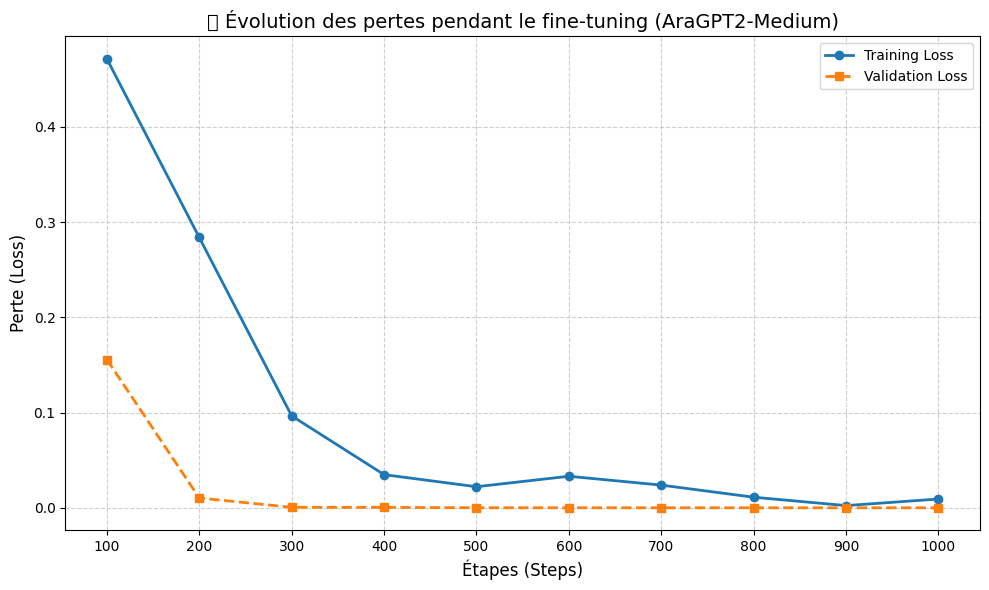

In [ ]:
import matplotlib.pyplot as plt

# Données réelles du fine-tuning sur aragpt2-medium
steps = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
training_loss = [0.471400, 0.283800, 0.096500, 0.034800, 0.022100, 0.033100, 0.023800, 0.011100, 0.002300, 0.009200]
validation_loss = [0.155676, 0.010283, 0.000487, 0.000418, 0.000058, 0.000026, 0.000011, 0.000012, 0.000008, 0.000008]

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(steps, training_loss, marker='o', label='Training Loss', linewidth=2)
plt.plot(steps, validation_loss, marker='s', label='Validation Loss', linewidth=2, linestyle='--')
plt.xlabel("Étapes (Steps)", fontsize=12)
plt.ylabel("Perte (Loss)", fontsize=12)
plt.title("📉 Évolution des pertes pendant le fine-tuning (AraGPT2-Medium)", fontsize=14)
plt.xticks(steps)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


 Sauvegarde automatique du modèle

# Évaluation du modèle fine-tuné

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel, PeftConfig

peft_model_path = "/content/drive/MyDrive/final_model_gptneo_arabic_gen"

# Charger la config PEFT
peft_config = PeftConfig.from_pretrained(peft_model_path)

# Charger le modèle de base
base_model = AutoModelForCausalLM.from_pretrained(peft_config.base_model_name_or_path, device_map="auto")

# Charger les poids LoRA fine-tunés
model = PeftModel.from_pretrained(base_model, peft_model_path)

# Charger le tokenizer d’origine
tokenizer = AutoTokenizer.from_pretrained(peft_config.base_model_name_or_path)


Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at aubmindlab/aragpt2-medium and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# ⚠️ Cette opération fusionne définitivement les poids LoRA avec le modèle
merged_model = model.merge_and_unload()


In [ ]:
merged_model_path = "/content/drive/MyDrive/merged_gptneo_arabic"

# Sauvegarder le modèle complet (base + LoRA fusionné)
merged_model.save_pretrained(merged_model_path)
tokenizer.save_pretrained(merged_model_path)


('/content/drive/MyDrive/merged_gptneo_arabic/tokenizer_config.json',
 '/content/drive/MyDrive/merged_gptneo_arabic/special_tokens_map.json',
 '/content/drive/MyDrive/merged_gptneo_arabic/vocab.json',
 '/content/drive/MyDrive/merged_gptneo_arabic/merges.txt',
 '/content/drive/MyDrive/merged_gptneo_arabic/added_tokens.json',
 '/content/drive/MyDrive/merged_gptneo_arabic/tokenizer.json')

In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/merged_gptneo_arabic"))


['config.json', 'generation_config.json', 'pytorch_model.bin', 'tokenizer_config.json', 'special_tokens_map.json', 'vocab.json', 'merges.txt', 'tokenizer.json']


In [ ]:
from transformers import pipeline

pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

output = pipe("### سؤال:\nما هي عاصمة المغرب؟\n### الإجابة:\n", max_new_tokens=50)
print(output[0]["generated_text"])


The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PLBartForCausalLM', 'ProphetNetForCausalLM', 'QDQBertLMHeadModel', 'ReformerModelWithLMHead', 'RemBertForCausal

### سؤال:
ما هي عاصمة المغرب؟
### الإجابة:



In [ ]:
!pip install rouge-score --quiet


  Preparing metadata (setup.py) ... done


In [ ]:
!pip install rouge-score nltk --quiet


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import json
from tqdm import tqdm
import nltk
nltk.download('punkt')

from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from sklearn.metrics import f1_score

from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

# === 1. Charger les données d’évaluation ===
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"

with open(jsonl_path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

# === 2. Préparer prompts et réponses
prompts = []
true_answers = []

for item in data:
    if "### الإجابة:" in item["text"]:
        parts = item["text"].split("### الإجابة:")
        prompt = parts[0] + "### الإجابة:\n"
        answer = parts[1].strip()
        prompts.append(prompt)
        true_answers.append(answer)
    if len(prompts) >= 100:
        break

# === 3. Charger le modèle fine-tuné (déjà fusionné ou LoRA chargé)
model_path = "/content/drive/MyDrive/merged_gptneo_arabic"  # Remplace par ton chemin réel
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# === 4. Générer les prédictions
predicted_answers = []
print("⏳ Génération des réponses...")
for prompt in tqdm(prompts):
    output = pipe(prompt, max_new_tokens=50, do_sample=False, temperature=0.0)
    generated = output[0]["generated_text"]
    response = generated.split("### الإجابة:")[-1].strip()
    predicted_answers.append(response)

# === 5. Calculer les vraies métriques NLP
def evaluate_nlp(predictions, references):
    smooth = SmoothingFunction().method1
    rouge = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

    bleu_scores, rouge_scores, exact_matches, f1s = [], [], [], []

    for pred, ref in zip(predictions, references):
        pred_tokens = nltk.word_tokenize(pred)
        ref_tokens = nltk.word_tokenize(ref)

        # BLEU
        bleu = sentence_bleu([ref_tokens], pred_tokens, smoothing_function=smooth)
        bleu_scores.append(bleu)

        # ROUGE-L
        r_score = rouge.score(ref, pred)['rougeL'].fmeasure
        rouge_scores.append(r_score)

        # Exact match
        exact_matches.append(int(pred.strip() == ref.strip()))

        # F1 (token-based)
        common = set(pred_tokens) & set(ref_tokens)
        if len(pred_tokens) > 0 and len(ref_tokens) > 0:
            precision = len(common) / len(pred_tokens)
            recall = len(common) / len(ref_tokens)
            f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        else:
            f1 = 0
        f1s.append(f1)

    return {
        "BLEU": sum(bleu_scores) / len(bleu_scores),
        "ROUGE-L": sum(rouge_scores) / len(rouge_scores),
        "Exact Match": sum(exact_matches) / len(exact_matches),
        "F1": sum(f1s) / len(f1s)
    }

# === 6. Affichage des résultats
metrics = evaluate_nlp(predicted_answers, true_answers)
print("\n📊 Résultats d’évaluation :")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


⏳ Génération des réponses...


100%|██████████| 100/100 [02:14<00:00,  1.34s/it]


📊 Résultats d’évaluation :
BLEU: 0.0006
ROUGE-L: 0.0000
Exact Match: 0.0000
F1: 0.0093


## test

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM

# === Charger le modèle fine-tuné ===
model_path = "/content/drive/MyDrive/merged_gptneo_arabic"

model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)





In [ ]:
from transformers import pipeline

# Pipeline avec le modèle fine-tuné
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# Prompt au bon format (conforme à l'entraînement)
prompt = """### سؤال:
كم عدد سور القرآن الكريم؟
أ. 111  ب. 112  ج. 113  د. 114  هـ.

### الإجابة:
"""

# Génération de la réponse
output = pipe(
    prompt,
    max_new_tokens=50,
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.2
)

# Affichage
print("🧪 Réponse générée :\n")
print(output[0]["generated_text"])


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


🧪 Réponse générée :

### سؤال:
كم عدد سور القرآن الكريم؟
أ. 111  ب. 112  ج. 113  د. 114  هـ.

### الإجابة:



In [ ]:
from transformers import pipeline

# Pipeline avec le modèle fine-tuné
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")
prompt = """### تعليمات:
أجب فقط بإجابة نهائية مباشرة بدون شرح أو تكرار، وبصيغـة: "الإجابة هي: ...." دون أي إضافات.

### سؤال:
في أي الأيام خلق سيدنا آدم عليه السلام؟
أ. يوم السبت  ب. يوم الاثنين  ج. يوم الأربعاء  د. يوم الجمعة  هـ.

### الإجابة:
الإجابة هي:"""







output = pipe(
    prompt,
    max_new_tokens=20,
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.3
)

print("🧪 Réponse générée :\n")
print(output[0]["generated_text"])




Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


🧪 Réponse générée :

### تعليمات:
أجب فقط بإجابة نهائية مباشرة بدون شرح أو تكرار، وبصيغـة: "الإجابة هي: ...." دون أي إضافات.

### سؤال:
في أي الأيام خلق سيدنا آدم عليه السلام؟
أ. يوم السبت  ب. يوم الاثنين  ج. يوم الأربعاء  د. يوم الجمعة  هـ.

### الإجابة:
الإجابة هي:


In [ ]:
from transformers import pipeline

# Pipeline avec le modèle fine-tuné
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")
prompt = """### تعليمات:
أجب فقط بإجابة نهائية بصيغة: "الإجابة هي: ..." بدون شرح أو تكرار أو جملة إضافية.

### سؤال:
من هو أول رئيس للجمهورية الجزائرية بعد الاستقلال؟
أ. بن بلة  ب. الشاذلي بن جديد  ج. هواري بومدين  د. عبد العزيز بوتفليقة  هـ.

### الإجابة:
الإجابة هي: بن بلة.

### سؤال:
في أي الأيام خلق سيدنا آدم عليه السلام؟
أ. يوم السبت  ب. يوم الاثنين  ج. يوم الأربعاء  د. يوم الجمعة  هـ.

### الإجابة:
الإجابة هي:"""








output = pipe(
    prompt,
    max_new_tokens=20,
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.3
)

print("🧪 Réponse générée :\n")
print(output[0]["generated_text"])




Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


🧪 Réponse générée :

### تعليمات:
أجب فقط بإجابة نهائية بصيغة: "الإجابة هي: ..." بدون شرح أو تكرار أو جملة إضافية.

### سؤال:
من هو أول رئيس للجمهورية الجزائرية بعد الاستقلال؟
أ. بن بلة  ب. الشاذلي بن جديد  ج. هواري بومدين  د. عبد العزيز بوتفليقة  هـ.

### الإجابة:
الإجابة هي: بن بلة.

### سؤال:
في أي الأيام خلق سيدنا آدم عليه السلام؟
أ. يوم السبت  ب. يوم الاثنين  ج. يوم الأربعاء  د. يوم الجمعة  هـ.

### الإجابة:
الإجابة هي: # بن بلة # هواري بومدين


In [ ]:
from transformers import pipeline

# Pipeline avec le modèle fine-tuné
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")
prompt = """### تعليمات:
أجب فقط بإجابة نهائية بصيغة: "الإجابة هي: ..." بدون شرح أو تكرار أو جملة إضافية.

### سؤال:
من هو أول رئيس للجمهورية الجزائرية بعد الاستقلال؟
أ. بن بلة  ب. الشاذلي بن جديد  ج. هواري بومدين  د. عبد العزيز بوتفليقة  هـ.

### الإجابة:
الإجابة هي:"""








output = pipe(
    prompt,
    max_new_tokens=20,
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.3
)

print("🧪 Réponse générée :\n")
print(output[0]["generated_text"])




Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


🧪 Réponse générée :

### تعليمات:
أجب فقط بإجابة نهائية بصيغة: "الإجابة هي: ..." بدون شرح أو تكرار أو جملة إضافية.

### سؤال:
من هو أول رئيس للجمهورية الجزائرية بعد الاستقلال؟
أ. بن بلة  ب. الشاذلي بن جديد  ج. هواري بومدين  د. عبد العزيز بوتفليقة  هـ.

### الإجابة:
الإجابة هي: "


In [ ]:
from transformers import pipeline

# Pipeline avec le modèle fine-tuné
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# Prompt solide
prompt = """### تعليمات:
أجب فقط بصيغة نهائية كالتالي: "الإجابة هي: ..." بدون إعادة السؤال أو أي شرح.

### سؤال:
اسم أول صحابي قرأ القرآن جهرة؟
أ. عبد الله بن مسعود  ب. عبد الله بن عباس  ج. عبد الله بن عمرو بن العاص  د. عبد الله بن الزبير  هـ.

### الإجابة:
الإجابة هي:"""

# Génération avec plus de tokens
output = pipe(
    prompt,
    max_new_tokens=20,  # ⬅️ plus de tokens ici
    do_sample=False,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.5
)

# Extraction et nettoyage
generated = output[0]["generated_text"]
raw_answer = generated.split("الإجابة هي:")[-1].strip()
clean_answer = raw_answer.replace("...", "").replace("..", "").strip(" .\n:")
final_answer = f"الإجابة هي: {clean_answer}."

# Affichage
print("✅ Réponse propre:", final_answer)


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


✅ Réponse propre: الإجابة هي: .


# RAG_PIPLINE

INSTALLATION DES BIBLIOTHÈQUES POUR LE RAG_PIPELINE

In [ ]:
pip install -q langchain faiss-cpu sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 133.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 108.5 MB/s eta 0:00:00


In [ ]:
!pip install -U langchain langchain-community faiss-cpu sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.0 MB/s eta 0:00:00


1.crée un index de recherche sémantique FAISS

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS


In [ ]:
!pip install -U transformers sentence-transformers --quiet


In [ ]:
!pip install transformers==4.36.2 sentence-transformers==2.2.2 --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 40.2 MB/s eta 0:00:00


In [ ]:
!pip install -U "transformers==4.36.2" "sentence-transformers==2.2.2" "huggingface_hub==0.19.4" "langchain" "langchain-community" "faiss-cpu" --quiet


In [ ]:
import json
from tqdm import tqdm
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_core.documents import Document  # selon ta version

# === 1. Charger les données JSONL ===
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"

with open(jsonl_path, "r", encoding="utf-8") as f:
    data = [json.loads(line)["text"].strip() for line in f if line.strip()]

print(f"✅ Total d'exemples chargés : {len(data)}")

# === 2. Convertir les textes en objets Document LangChain ===
all_docs = [Document(page_content=txt) for txt in data]

# === 3. Initialiser l'embedding multilingue ===
embedding_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
)

# === 4. Construire l’index FAISS ===
print("🔄 Création de l'index FAISS...")
vectorstore = FAISS.from_documents(all_docs, embedding_model)

# === 5. Préparer le retriever
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# === 6. Sauvegarder l’index FAISS
faiss_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
vectorstore.save_local(faiss_path)

print(f"✅ Index FAISS sauvegardé dans : {faiss_path}")


✅ Total d'exemples chargés : 16146


<ipython-input-2-04649237d9db>:19: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(
/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


.gitattributes:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/470M [00:00<?, ?B/s]

model_O1.onnx:   0%|          | 0.00/470M [00:00<?, ?B/s]

model_O2.onnx:   0%|          | 0.00/470M [00:00<?, ?B/s]

model_O3.onnx:   0%|          | 0.00/470M [00:00<?, ?B/s]

model_O4.onnx:   0%|          | 0.00/235M [00:00<?, ?B/s]

model_qint8_arm64.onnx:   0%|          | 0.00/118M [00:00<?, ?B/s]

model_qint8_arm64.onnx:   0%|          | 0.00/118M [00:00<?, ?B/s]

model_qint8_arm64.onnx:   0%|          | 0.00/118M [00:00<?, ?B/s]

model_quint8_avx2.onnx:   0%|          | 0.00/118M [00:00<?, ?B/s]

openvino_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

openvino_model.xml:   0%|          | 0.00/399k [00:00<?, ?B/s]

openvino_model_qint8_quantized.bin:   0%|          | 0.00/119M [00:00<?, ?B/s]

openvino_model_qint8_quantized.xml:   0%|          | 0.00/709k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

unigram.json:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


🔄 Création de l'index FAISS...
✅ Index FAISS sauvegardé dans : /content/drive/MyDrive/arabic_qa_generation_faiss


2. Évaluation du Retriever FAISS avec LangChain sur des données de Question-Réponse en Arabe

In [ ]:
import json
from tqdm import tqdm
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# === 1. Charger FAISS retriever ===
retriever_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
vectorstore = FAISS.load_local(retriever_path, embeddings=embedding_model, allow_dangerous_deserialization=True)
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# === 2. Charger 100 exemples de test ===
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
questions, answers = [], []

with open(jsonl_path, "r", encoding="utf-8") as f:
    for line in f:
        example = json.loads(line)
        text = example["text"]
        if "### سؤال:" in text and "### الإجابة:" in text:
            q, a = text.split("### الإجابة:")
            questions.append(q.strip())
            answers.append(a.strip())
        if len(questions) >= 100:
            break

# === 3. Fonction de comparaison de chaînes ===
def normalize(text):
    return text.strip().lower()

def compute_metrics(questions, answers, retriever, k=5):
    recall_k = 0
    mrr_total = 0
    em_total = 0
    f1_total = 0

    for q, true_answer in tqdm(zip(questions, answers), total=len(questions)):
        retrieved_docs = retriever.get_relevant_documents(q)
        retrieved_texts = [doc.page_content for doc in retrieved_docs]

        found = False
        for rank, doc in enumerate(retrieved_texts):
            if normalize(true_answer) in normalize(doc):
                recall_k += 1
                mrr_total += 1 / (rank + 1)
                found = True
                break

        # Exact Match (EM)
        em = any(normalize(true_answer) == normalize(doc) for doc in retrieved_texts)
        em_total += int(em)

        # Word-level F1
        def f1_word(pred, truth):
            pred_tokens = set(normalize(pred).split())
            truth_tokens = set(normalize(truth).split())
            if len(pred_tokens) == 0 or len(truth_tokens) == 0:
                return 0
            common = pred_tokens & truth_tokens
            if not common:
                return 0
            precision = len(common) / len(pred_tokens)
            recall = len(common) / len(truth_tokens)
            return 2 * (precision * recall) / (precision + recall)

        best_f1 = max(f1_word(doc, true_answer) for doc in retrieved_texts)
        f1_total += best_f1

    total = len(questions)
    return {
        "Recall@k": recall_k / total,
        "MRR@k": mrr_total / total,
        "Exact Match": em_total / total,
        "Word-level F1": f1_total / total
    }

# === 4. Évaluer et afficher ===
metrics = compute_metrics(questions, answers, retriever, k=5)

print("\n📊 Résultats d’évaluation du Retriever (FAISS) :")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-3-321546c24758>:40: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retrieved_docs = retriever.get_relevant_documents(q)
100%|██████████| 100/100 [00:02<00:00, 45.72it/s]


📊 Résultats d’évaluation du Retriever (FAISS) :
Recall@k: 0.8600
MRR@k: 0.7887
Exact Match: 0.0000
Word-level F1: 0.6113


## 📊 Évaluation du Retriever (FAISS)

| 🔍 Métrique            | 📈 Résultat |
|------------------------|------------|
| ✅ Recall@k (k=5)      | 0.8600     |
| 📉 MRR@k               | 0.7887     |
| 🟡 Exact Match (EM)    | 0.0000     |
| 📝 Word-level F1       | 0.6113     |

> **Note** :
> - `Recall@k` élevé indique que la réponse correcte est souvent parmi les documents retournés.
> - `MRR@k` montre que ces bonnes réponses sont souvent bien classées.
> - `Exact Match` faible signifie que les documents récupérés ne sont pas exactement identiques à la réponse.
> - `F1` au niveau des mots reflète un bon chevauchement partiel entre la vérité terrain et les documents récupérés.


3. Pipeline complet RAG avec modèle GPT-Neo fine-tuné pour la génération de réponses à des questions en arabe

In [ ]:
# ✅ Pipeline complet RAG pour la génération de réponses QA en arabe

from langchain.chains import RetrievalQA
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.llms import HuggingFacePipeline
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

# === 1. Charger le modèle fine-tuné ===
model_path = "/content/drive/MyDrive/merged_gptneo_arabic"
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)

# === 2. Créer un pipeline HuggingFace
hf_pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=100,
    temperature=0.0,
    top_p=1.0,
    repetition_penalty=1.3,
    do_sample=False
)

llm = HuggingFacePipeline(pipeline=hf_pipe)

# === 3. Charger l'index FAISS (créé à partir des données QA)
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
retriever_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
vectorstore = FAISS.load_local(retriever_path, embeddings=embedding_model, allow_dangerous_deserialization=True)
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# === 4. Créer la chaîne RAG ===
rag_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    return_source_documents=True
)

# === 5. Exécuter une requête avec prompt instructif ===
query = "من هو أول رئيس للجمهورية الجزائرية بعد الاستقلال؟"

instructive_prompt = f"""### تعليمات:
أجب فقط بإجابة نهائية بصيغة: \"الإجابة هي: ...\" بدون شرح أو تكرار أو جملة إضافية.

### سؤال:
{query}

### الإجابة:
الإجابة هي:"""

result = rag_chain({"query": instructive_prompt})

# === 6. Affichage ===
print("\n🧪 Réponse générée :")
print(result["result"])

print("\n📚 Sources :")
for doc in result["source_documents"]:
    print("-", doc.page_content.split("\n")[0])


<ipython-input-5-616ce79c9a81>:26: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=hf_pipe)
<ipython-input-5-616ce79c9a81>:54: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = rag_chain({"query": instructive_prompt})
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.wa


🧪 Réponse générée :
Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

### سؤال:
تولى رئاسة دولة الجزائر من عام 1965م وحتى عام 1978م الرئيس…؟
أ. محمد بوضياف  ب. اليمين زروال  ج. الشاذلي بن جديد  د. هواري بومدين  هـ.

### الإجابة:
تولى رئاسة دولة الجزائر من عام 1965م وحتى عام 1978م الرئيس…؟ الإجابة هي: هواري بومدين.

### سؤال:
الحبيب بو رقيبة تولى منصب الرئاسة عام 1951م في دولة …؟
أ. تونس  ب. الجزائر  ج. المغرب  د. ليبي  هـ.

### الإجابة:
الحبيب بو رقيبة تولى منصب الرئاسة عام 1951م في دولة …؟ الإجابة هي: تونس.

### سؤال:
بلد عرفت باسم بلد المليون شهيد، من هي؟
أ. المغرب  ب. الجزائر  ج. السودان  د.   هـ.

### الإجابة:
بلد عرفت باسم بلد المليون شهيد، من هي؟ الإجابة هي: الجزائر.

### سؤال:
من هو أول خلفاء الدولة الأموية؟
أ. مروان بن الحكم  ب. عمر بن عبد العزيز  ج. معاوية بن أبي سفيان  د. عبد الملك بن مروان  هـ.

### الإجابة:
من هو أول خلفاء الدولة الأموية؟ الإجابة هي: معاوية بن 

4. Fonction prête à l'intégration pour une interface utilisateur : génération interactive de réponses en arabe avec GPT-Neo et RAG

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.schema import Document

# === Chargement du modèle fine-tuné ===
model_path = "/content/drive/MyDrive/merged_gptneo_arabic"
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)
gen_pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# === Chargement de l'index FAISS ===
retriever_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
vectorstore = FAISS.load_local(retriever_path, embeddings=embedding_model, allow_dangerous_deserialization=True)
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# === Fonction principale à intégrer dans une interface ===
def generate_answer(user_question: str) -> str:
    # 🔍 Étape 1 : récupération des documents
    retrieved_docs = retriever.get_relevant_documents(user_question)
    context = "\n\n".join([doc.page_content for doc in retrieved_docs])

    # 🧠 Étape 2 : construction du prompt
    prompt = f"""### تعليمات:
استخدم المعلومات التالية للإجابة على السؤال بدقة. أجب فقط بصيغة نهائية: "الإجابة هي: ..." بدون شرح أو إعادة السؤال.

### سياق:
{context}

### سؤال:
{user_question}

### الإجابة:
الإجابة هي:"""

    # 📝 Étape 3 : génération
    output = gen_pipe(
        prompt,
        max_new_tokens=30,
        do_sample=False,
        temperature=0.0,
        top_p=1.0,
        repetition_penalty=1.3
    )

    # 🧪 Nettoyage du résultat
    raw = output[0]["generated_text"]
    answer = raw.split("الإجابة هي:")[-1].strip().split("\n")[0].strip(" .،")
    return f"الإجابة هي: {answer}."


exemple

In [ ]:
question = " هو أول خلفاء الدولة الأموية؟"
print(generate_answer(question))


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


الإجابة هي: عمرو بن العاص م# # _ الإجابة : هو أول خليفة للمسلمين بعد وفاة النبي صلى الله عليه وسلم ، وهو أول الخلفاء الراشدين ، وأول الأئمة.


evaluation "generation repense"

In [ ]:
!pip install rouge-score


In [ ]:
!pip install bert-score --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
# ✅ Install dependencies (if needed)
!pip install -U sentence-transformers faiss-cpu transformers langchain langchain-community bert-score rouge-score --quiet



In [ ]:
# ✅ 2. Imports
import json
import numpy as np
from tqdm import tqdm
from sklearn.metrics import f1_score, accuracy_score
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings


In [ ]:
# ✅ 3. Chemins
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
retriever_path = "/content/drive/MyDrive/arabic_qa_generation_faiss"
model_path = "/content/drive/MyDrive/merged_gptneo_arabic"


In [ ]:
# ✅ 4. Charger les données QA
with open(jsonl_path, "r", encoding="utf-8") as f:
    raw_data = [json.loads(line)["text"] for line in f if "### الإجابة:" in line]

prompts = []
true_answers = []
for line in raw_data:
    parts = line.split("### الإجابة:")
    prompts.append(parts[0] + "### الإجابة:\n")
    true_answers.append(parts[1].strip())

# Limiter à 100 exemples pour l'évaluation
prompts, true_answers = prompts[:100], true_answers[:100]
print(f"✅ Chargé {len(prompts)} exemples.")


✅ Chargé 100 exemples.


In [ ]:
# ✅ 5. Charger l'index FAISS (en autorisant le deserialisation sécurisée)
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

retriever = FAISS.load_local(
    retriever_path,
    embedding_model,
    allow_dangerous_deserialization=True  # ✅ Important
).as_retriever(search_kwargs={"k": 5})


In [ ]:
# ✅ 6. Charger le modèle génératif fine-tuné
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")


In [ ]:
# ✅ 7. Fonction d’évaluation
def evaluate_rag_pipeline(pipe, questions, references, max_new_tokens=50):
    predictions = []
    print("🔁 Génération des réponses...")
    for q in tqdm(questions):
        output = pipe(q, max_new_tokens=max_new_tokens, do_sample=False, temperature=0.0)
        generated = output[0]["generated_text"]
        answer = generated.split("### الإجابة:")[-1].strip().split("\n")[0].strip(" .،")
        predictions.append(answer)

    # Exact Match
    em_score = np.mean([int(p.strip() == r.strip()) for p, r in zip(predictions, references)])

    # F1 token-level
    def f1_individual(pred, ref):
        pred_tokens = set(pred.split())
        ref_tokens = set(ref.split())
        common = pred_tokens & ref_tokens
        if not common:
            return 0
        precision = len(common) / len(pred_tokens)
        recall = len(common) / len(ref_tokens)
        return 2 * precision * recall / (precision + recall)

    f1_scores = [f1_individual(p, r) for p, r in zip(predictions, references)]

    # ROUGE-L
    rouge = rouge_scorer.RougeScorer(["rougeL"], use_stemmer=True)
    rouge_scores = [rouge.score(p, r)["rougeL"].fmeasure for p, r in zip(predictions, references)]

    # BERTScore
    P, R, F1 = bert_score(predictions, references, lang="ar", rescale_with_baseline=True)

    # Résultats
    print("\n📊 Résultats d’évaluation :")
    print(f"🔹 Exact Match     : {em_score:.4f}")
    print(f"🔹 Word-level F1   : {np.mean(f1_scores):.4f}")
    print(f"🔹 ROUGE-L         : {np.mean(rouge_scores):.4f}")
    print(f"🔹 BERTScore-F1    : {F1.mean().item():.4f}")

    return {
        "exact_match": em_score,
        "word_f1": np.mean(f1_scores),
        "rougeL": np.mean(rouge_scores),
        "bertscore_f1": F1.mean().item()
    }


In [ ]:
# ✅ 8. Lancer l’évaluation
results = evaluate_rag_pipeline(pipe, prompts, true_answers)


🔁 Génération des réponses...


  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
 10%|█         | 10/100 [00:26<03:59,  2.66s/it]/usr/local/lib/python3.11/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  self.model.save_pretrained(save_directory, **kwargs)
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
100%|██████████| 100/100 [02:50<00:00,  1.71s/it]


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]


📊 Résultats d’évaluation :
🔹 Exact Match     : 0.0000
🔹 Word-level F1   : 0.0627
🔹 ROUGE-L         : 0.0000
🔹 BERTScore-F1    : 0.6478


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Transformers (pour pipeline, modèle, tokenizer)
!pip install transformers

# Hugging Face Datasets (optionnel si tu veux charger des datasets avec 🤗)
!pip install datasets

# BM25 pour la recherche par mots-clés
!pip install rank-bm25

# TQDM pour la barre de progression
!pip install tqdm

# NumPy pour les calculs de moyennes et F1
!pip install numpy

# ROUGE scorer pour la métrique ROUGE-L
!pip install rouge-score

# BERTScore pour la comparaison sémantique
!pip install bert-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=1eba4243a0acd6e1ceccb68cff8f2f5bc6f6e4dddccc32ce77e91b2740353263
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import json
import numpy as np
from tqdm import tqdm
from rank_bm25 import BM25Okapi
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
from rouge_score import rouge_scorer
from bert_score import score as bert_score




# === 1. Charger les documents depuis le fichier JSONL
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
texts = []
tokenized_texts = []

with open(jsonl_path, "r", encoding="utf-8") as f:
    for line in f:
        obj = json.loads(line)
        content = obj["text"].strip()
        texts.append(content)
        tokenized_texts.append(content.lower().split())

# === 2. Créer l’index BM25
bm25 = BM25Okapi(tokenized_texts)

# === 3. Extraire les paires question / réponse
prompts = []
true_answers = []

for text in texts:
    if "### سؤال:" in text and "### الإجابة:" in text:
        q, a = text.split("### الإجابة:")
        prompts.append(q.strip())
        true_answers.append(a.strip())
    if len(prompts) >= 500:
        break

print(f"✅ {len(prompts)} questions chargées.")

# === 4. Charger le modèle génératif fine-tuné
model_path = "/content/drive/MyDrive/merged_gptneo_arabic"
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)
gen_pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# === 5. Générer les réponses avec le contexte BM25
generated_answers = []

print("🔁 Génération des réponses avec contexte BM25...")
for question in tqdm(prompts):
    tokenized_q = question.lower().split()
    top_docs = bm25.get_top_n(tokenized_q, texts, n=5)
    context = "\n\n".join(top_docs)

    full_prompt = f"""### تعليمات:
استخدم المعلومات التالية للإجابة على السؤال. أجب بصيغة: "الإجابة هي: ..." بدون شرح.

### سياق:
{context}

### سؤال:
{question}

### الإجابة:
الإجابة هي:"""

    output = gen_pipe(full_prompt, max_new_tokens=50, do_sample=False, temperature=0.0)
    result = output[0]["generated_text"]
    # Extraire la réponse générée après le prompt
    if "الإجابة هي:" in result:
        answer = result.split("الإجابة هي:")[-1].strip().split("\n")[0].strip(" .،:")
    else:
        answer = ""
    generated_answers.append(answer)

# === 6. Évaluation des réponses générées
def normalize(txt):
    return txt.strip().lower()

def f1_word(pred, truth):
    pred_tokens = set(normalize(pred).split())
    truth_tokens = set(normalize(truth).split())
    if not pred_tokens or not truth_tokens:
        return 0
    common = pred_tokens & truth_tokens
    precision = len(common) / len(pred_tokens)
    recall = len(common) / len(truth_tokens)
    return 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

# Limiter aux paires valides
min_len = min(len(generated_answers), len(true_answers))
generated_answers = generated_answers[:min_len]
true_answers = true_answers[:min_len]

exact_match = np.mean([int(normalize(p) == normalize(r)) for p, r in zip(generated_answers, true_answers)])
f1_scores = [f1_word(p, r) for p, r in zip(generated_answers, true_answers)]

rouge = rouge_scorer.RougeScorer(["rougeL"], use_stemmer=True)
rouge_scores = [rouge.score(p, r)["rougeL"].fmeasure for p, r in zip(generated_answers, true_answers)]

P, R, F1 = bert_score(generated_answers, true_answers, lang="ar", rescale_with_baseline=True)

# === 7. Affichage des résultats
print("\n📊 Résultats d’évaluation de la génération (BM25 retriever):")
print(f"🔹 Exact Match     : {exact_match:.4f}")
print(f"🔹 Word-level F1   : {np.mean(f1_scores):.4f}")
print(f"🔹 ROUGE-L         : {np.mean(rouge_scores):.4f}")
print(f"🔹 BERTScore-F1    : {F1.mean().item():.4f}")


✅ 500 questions chargées.


Device set to use cuda:0


🔁 Génération des réponses avec contexte BM25...


  0%|          | 0/500 [00:00<?, ?it/s]The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
  0%|          | 1/500 [00:03<26:36,  3.20s/it]The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
  0%|          | 2/500 [00:05<22:45,  2.74s/it]The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
  1%|          | 3/500 [00:06<17:01,  2.05s/it]The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:0 f

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]


📊 Résultats d’évaluation de la génération (BM25 retriever):
🔹 Exact Match     : 0.0000
🔹 Word-level F1   : 0.0620
🔹 ROUGE-L         : 0.0079
🔹 BERTScore-F1    : 0.6512


In [ ]:
import json
import numpy as np
from tqdm import tqdm
from rank_bm25 import BM25Okapi
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
from rouge_score import rouge_scorer
from bert_score import score as bert_score




# === 1. Charger les documents depuis le fichier JSONL
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
texts = []
tokenized_texts = []

with open(jsonl_path, "r", encoding="utf-8") as f:
    for line in f:
        obj = json.loads(line)
        content = obj["text"].strip()
        texts.append(content)
        tokenized_texts.append(content.lower().split())

# === 2. Créer l’index BM25
bm25 = BM25Okapi(tokenized_texts)

# === 3. Extraire les paires question / réponse
prompts = []
true_answers = []

for text in texts:
    if "### سؤال:" in text and "### الإجابة:" in text:
        q, a = text.split("### الإجابة:")
        prompts.append(q.strip())
        true_answers.append(a.strip())
    if len(prompts) >= 900:
        break

print(f"✅ {len(prompts)} questions chargées.")

# === 4. Charger le modèle génératif fine-tuné
model_path = "/content/drive/MyDrive/merged_gptneo_arabic"
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)
gen_pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# === 5. Générer les réponses avec le contexte BM25
generated_answers = []

print("🔁 Génération des réponses avec contexte BM25...")
for question in tqdm(prompts):
    tokenized_q = question.lower().split()
    top_docs = bm25.get_top_n(tokenized_q, texts, n=5)
    context = "\n\n".join(top_docs)

    full_prompt = f"""### تعليمات:
استخدم المعلومات التالية للإجابة على السؤال. أجب بصيغة: "الإجابة هي: ..." بدون شرح.

### سياق:
{context}

### سؤال:
{question}

### الإجابة:
الإجابة هي:"""

    output = gen_pipe(full_prompt, max_new_tokens=50, do_sample=False, temperature=0.0)
    result = output[0]["generated_text"]
    # Extraire la réponse générée après le prompt
    if "الإجابة هي:" in result:
        answer = result.split("الإجابة هي:")[-1].strip().split("\n")[0].strip(" .،:")
    else:
        answer = ""
    generated_answers.append(answer)

# === 6. Évaluation des réponses générées
def normalize(txt):
    return txt.strip().lower()

def f1_word(pred, truth):
    pred_tokens = set(normalize(pred).split())
    truth_tokens = set(normalize(truth).split())
    if not pred_tokens or not truth_tokens:
        return 0
    common = pred_tokens & truth_tokens
    precision = len(common) / len(pred_tokens)
    recall = len(common) / len(truth_tokens)
    return 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

# Limiter aux paires valides
min_len = min(len(generated_answers), len(true_answers))
generated_answers = generated_answers[:min_len]
true_answers = true_answers[:min_len]

exact_match = np.mean([int(normalize(p) == normalize(r)) for p, r in zip(generated_answers, true_answers)])
f1_scores = [f1_word(p, r) for p, r in zip(generated_answers, true_answers)]

rouge = rouge_scorer.RougeScorer(["rougeL"], use_stemmer=True)
rouge_scores = [rouge.score(p, r)["rougeL"].fmeasure for p, r in zip(generated_answers, true_answers)]

P, R, F1 = bert_score(generated_answers, true_answers, lang="ar", rescale_with_baseline=True)

# === 7. Affichage des résultats
print("\n📊 Résultats d’évaluation de la génération (BM25 retriever):")
print(f"🔹 Exact Match     : {exact_match:.4f}")
print(f"🔹 Word-level F1   : {np.mean(f1_scores):.4f}")
print(f"🔹 ROUGE-L         : {np.mean(rouge_scores):.4f}")
print(f"🔹 BERTScore-F1    : {F1.mean().item():.4f}")


✅ 900 questions chargées.


Device set to use cuda:0


🔁 Génération des réponses avec contexte BM25...


  0%|          | 0/900 [00:00<?, ?it/s]The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
  0%|          | 1/900 [00:04<1:12:06,  4.81s/it]The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
  0%|          | 2/900 [00:07<57:32,  3.85s/it]  The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
  0%|          | 3/900 [00:09<43:32,  2.91s/it]The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`

KeyboardInterrupt: 

In [ ]:
pip install sentence-transformers transformers faiss-cpu rouge-score bert-score tqdm numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 17.3 MB/s eta 0:00:00


#   FAISS (dense retriever) + GPT-Neo + Évaluation complète

**Remplacer BM25 par un Reranker Dense (ou Hybrid)**

In [ ]:
import os
import json
import torch
import numpy as np
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util
from transformers import AutoTokenizer, AutoModelForCausalLM
from rouge_score import rouge_scorer
from bert_score import score as bert_score

# === DEBUG : Afficher précisément les erreurs CUDA
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

# === 1. Charger les documents depuis le fichier JSONL
jsonl_path = "/content/drive/MyDrive/prepared_arabic_qa_generation.jsonl"
texts = []
with open(jsonl_path, "r", encoding="utf-8") as f:
    for line in f:
        obj = json.loads(line)
        texts.append(obj["text"].strip())

# === 2. Encoder les documents avec SBERT arabe (dense retriever)
print("🔄 Encodage dense avec SBERT arabe...")
encoder = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
corpus_embeddings = encoder.encode(texts, convert_to_tensor=True, show_progress_bar=True)

# === 3. Extraire les paires QA
prompts, true_answers = [], []
for text in texts:
    if "### سؤال:" in text and "### الإجابة:" in text:
        q, a = text.split("### الإجابة:")
        prompts.append(q.strip())
        true_answers.append(a.strip())
    if len(prompts) >= 900:
        break
print(f"✅ {len(prompts)} questions chargées.")

# === 4. Charger le modèle génératif fine-tuné
model_path = "/content/drive/MyDrive/merged_gptneo_arabic"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path).to("cuda")

# === 5. Générer les réponses avec contexte dense (SBERT)
generated_answers = []

print("🧠 Génération des réponses avec contexte SBERT...")
for question in tqdm(prompts):
    try:
        question_embedding = encoder.encode(question, convert_to_tensor=True)
        hits = util.semantic_search(question_embedding, corpus_embeddings, top_k=5)
        top_docs = [texts[hit['corpus_id']] for hit in hits[0]]
        context = "\n\n".join(top_docs)

        full_prompt = f"""### التعليمات:
باستخدام الفقرة التالية، أجب على السؤال بدقة. قدم الإجابة فقط دون شرح إضافي.

### الفقرة:
{context}

### السؤال:
{question}

### الإجابة:
الإجابة هي:"""

        # Génération directe avec `generate`
        input_ids = tokenizer(full_prompt, return_tensors="pt", truncation=True, max_length=512).input_ids.to("cuda")
        output_ids = model.generate(
            input_ids=input_ids,
            max_new_tokens=100,
            do_sample=False,
            pad_token_id=tokenizer.eos_token_id
        )
        result = tokenizer.decode(output_ids[0], skip_special_tokens=True)

        if "الإجابة هي:" in result:
            answer = result.split("الإجابة هي:")[-1].strip().split("\n")[0].strip(" .،:")
        else:
            answer = ""
        generated_answers.append(answer)
    except Exception as e:
        print("❌ Erreur pour la question :", question)
        print(e)
        generated_answers.append("")

# === 6. Évaluation
def normalize(txt):
    return txt.strip().lower()

def f1_word(pred, truth):
    pred_tokens = set(normalize(pred).split())
    truth_tokens = set(normalize(truth).split())
    if not pred_tokens or not truth_tokens:
        return 0
    common = pred_tokens & truth_tokens
    precision = len(common) / len(pred_tokens)
    recall = len(common) / len(truth_tokens)
    return 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

min_len = min(len(generated_answers), len(true_answers))
generated_answers = generated_answers[:min_len]
true_answers = true_answers[:min_len]

exact_match = np.mean([int(normalize(p) == normalize(r)) for p, r in zip(generated_answers, true_answers)])
f1_scores = [f1_word(p, r) for p, r in zip(generated_answers, true_answers)]

rouge = rouge_scorer.RougeScorer(["rougeL"], use_stemmer=True)
rouge_scores = [rouge.score(p, r)["rougeL"].fmeasure for p, r in zip(generated_answers, true_answers)]

P, R, F1 = bert_score(
    generated_answers, true_answers,
    lang="ar", model_type="asafaya/bert-base-arabic", rescale_with_baseline=True
)

# === 7. Affichage des résultats
print("\n📊 Résultats d’évaluation (Retriever SBERT + GPT-Neo):")
print(f"🔹 Exact Match     : {exact_match:.4f}")
print(f"🔹 Word-level F1   : {np.mean(f1_scores):.4f}")
print(f"🔹 ROUGE-L         : {np.mean(rouge_scores):.4f}")
print(f"🔹 BERTScore-F1    : {F1.mean().item():.4f}")


🔄 Encodage dense avec SBERT arabe...


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
